In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.api as sm
## x ='kaggle kernels output satznova\predict-indian-house-prices-eda-and-prediction-v1 -p \path\to\dest'
## x=pd.read.csv("train-chennai-sale.csv.zip")
## x=pd.read.csv("C:/Users/EZHILVATHANI S/Downloads/archive.zip")



In [2]:
from sklearn.impute import SimpleImputer

In [3]:
x=pd.read_csv('C:/Users/EZHILVATHANI S/Downloads/train-chennai-sale.csv')
x.head()


#y= sales price

,PRT_ID,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)"
0,P09411,Anna Nagar,1986,19-12-2006,2.0,1.0,5,Ab Normal,No,22-12-1995,...,4.9,4.2,2.5,3.765,760122,304049,21717770,40676975.91,1.04,1.872981
1,P05346,Velachery,1855,13-03-2010,3.0,2.0,5,Family,No,18-03-1988,...,4.7,3.9,3.6,4.010,356321,77042,9630290,15418404.56,1.04,1.601032
2,P00219,Chrompet,1220,11-09-2014,2.0,1.0,4,Partial,No,12-09-2009,...,4.5,2.6,3.1,3.320,409027,198316,12394750,16963071.24,1.04,1.368569
3,P09105,Chrompet,1167,05-04-2007,1.0,1.0,3,Partial,No,12-04-1979,...,3.6,2.1,2.5,2.670,263152,33955,8488790,15287831.22,1.04,1.800944
4,P09679,Velachery,1847,13-03-2006,3.0,2.0,5,Family,No,15-03-1996,...,2.4,4.5,2.1,3.260,604809,235204,16800250,31466553.17,1.04,1.872981


In [4]:
x.shape

(7109, 24)

In [5]:
x.nunique()

PRT_ID           7109
AREA                7
INT_SQFT         1699
DATE_SALE        2798
N_BEDROOM           4
N_BATHROOM          2
N_ROOM              5
SALE_COND           5
PARK_FACIL          2
DATE_BUILD       5808
BUILDTYPE           3
UTILITY_AVAIL       3
STREET              3
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        479
REG_FEE          7038
COMMIS           7011
SALES_PRICE      7057
INF_PRICE        7096
1+0.04              1
POWER(Z,Y)         12
dtype: int64

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  REG_FEE 

In [7]:
import datetime
x.DATE_SALE = pd.to_datetime(x.DATE_SALE)
x.DATE_BUILD = pd.to_datetime(x.DATE_BUILD)

In [8]:
x.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
INF_PRICE         0
1+0.04            0
POWER(Z,Y)        0
dtype: int64

In [9]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(x[['N_BEDROOM','N_BATHROOM','QS_OVERALL']])
x[['N_BEDROOM','N_BATHROOM','QS_OVERALL']] = imputer.transform(x[['N_BEDROOM','N_BATHROOM','QS_OVERALL']])
x

,PRT_ID,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)"
0,P09411,Anna Nagar,1986,2006-12-19,2.0,1.0,5,Ab Normal,No,1995-12-22,...,4.9,4.2,2.5,3.765,760122,304049,21717770,4.067698e+07,1.04,1.872981
1,P05346,Velachery,1855,2010-03-13,3.0,2.0,5,Family,No,1988-03-18,...,4.7,3.9,3.6,4.010,356321,77042,9630290,1.541840e+07,1.04,1.601032
2,P00219,Chrompet,1220,2014-11-09,2.0,1.0,4,Partial,No,2009-12-09,...,4.5,2.6,3.1,3.320,409027,198316,12394750,1.696307e+07,1.04,1.368569
3,P09105,Chrompet,1167,2007-05-04,1.0,1.0,3,Partial,No,1979-12-04,...,3.6,2.1,2.5,2.670,263152,33955,8488790,1.528783e+07,1.04,1.800944
4,P09679,Velachery,1847,2006-03-13,3.0,2.0,5,Family,No,1996-03-15,...,2.4,4.5,2.1,3.260,604809,235204,16800250,3.146655e+07,1.04,1.872981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P05438,T Nagar,1733,2010-02-24,1.0,1.0,4,Ab Normal,Yes,1985-02-03,...,3.4,3.7,2.1,2.890,702058,312026,19501600,3.122269e+07,1.04,1.601032
7105,P05042,Karapakkam,666,2010-11-05,1.0,1.0,2,Adj Land,Yes,1974-05-20,...,3.2,4.4,2.5,3.280,273317,74541,6211750,9.945212e+06,1.04,1.601032
7106,P10000,Velachery,1897,2004-08-04,3.0,2.0,5,Family,Yes,1995-11-04,...,3.6,4.5,3.3,3.920,346191,205551,10818480,2.191626e+07,1.04,2.025817
7107,P06508,Karapakkam,787,2009-03-08,1.0,1.0,2,Partial,Yes,1977-11-08,...,4.6,3.8,4.1,4.160,425350,119098,8507000,1.416478e+07,1.04,1.665074


In [10]:
#x['N_BATHROOM']=x['N_BATHROOM'].replace(np.NaN,x['N_BATHROOM'].mean())
#x['N_BATHROOM'].head()

In [11]:
'''from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(x[['N_BEDROOM']])
x['N_BEDROOM'] = imputer.transform(x[['N_BEDROOM']])
x'''

"from sklearn.impute import SimpleImputer\n\nimputer = SimpleImputer(strategy='mean', missing_values=np.nan)\nimputer = imputer.fit(x[['N_BEDROOM']])\nx['N_BEDROOM'] = imputer.transform(x[['N_BEDROOM']])\nx"

In [12]:
x.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
INF_PRICE        0
1+0.04           0
POWER(Z,Y)       0
dtype: int64

In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   N_BEDROOM      7109 non-null   float64       
 5   N_BATHROOM     7109 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

In [14]:
x.describe()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)"
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7.109000e+03,7.109000e+03,7109.000000
mean,1382.073006,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07,1.767201e+07,1.040000e+00,1.621739
std,457.410902,0.802845,0.409495,1.019099,0.891972,0.897834,0.887266,0.525440,143070.662010,78768.093718,3.768603e+06,6.310658e+06,3.330903e-14,0.141455
min,500.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,3.591355e+06,1.040000e+00,1.315932
25%,993.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06,1.323023e+07,1.040000e+00,1.539454
50%,1373.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,349486.000000,127628.000000,1.033505e+07,1.687515e+07,1.040000e+00,1.601032
75%,1744.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,451562.000000,184506.000000,1.299390e+07,2.098167e+07,1.040000e+00,1.731676
max,2500.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,4.354230e+07,1.040000e+00,2.025817


In [15]:
x.nunique()

PRT_ID           7109
AREA                7
INT_SQFT         1699
DATE_SALE        2798
N_BEDROOM           5
N_BATHROOM          3
N_ROOM              5
SALE_COND           5
PARK_FACIL          2
DATE_BUILD       5808
BUILDTYPE           3
UTILITY_AVAIL       3
STREET              3
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        480
REG_FEE          7038
COMMIS           7011
SALES_PRICE      7057
INF_PRICE        7096
1+0.04              1
POWER(Z,Y)         12
dtype: int64

In [16]:
cols=x.columns
cols

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE',
       'INF_PRICE', '1+0.04', 'POWER(Z,Y)'],
      dtype='object')

In [17]:
x = x.drop(['PRT_ID'], axis=1)



In [18]:
x.head()


,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)"
0,Anna Nagar,1986,2006-12-19,2.0,1.0,5,Ab Normal,No,1995-12-22,Commercial,...,4.9,4.2,2.5,3.765,760122,304049,21717770,40676975.91,1.04,1.872981
1,Velachery,1855,2010-03-13,3.0,2.0,5,Family,No,1988-03-18,Others,...,4.7,3.9,3.6,4.010,356321,77042,9630290,15418404.56,1.04,1.601032
2,Chrompet,1220,2014-11-09,2.0,1.0,4,Partial,No,2009-12-09,Commercial,...,4.5,2.6,3.1,3.320,409027,198316,12394750,16963071.24,1.04,1.368569
3,Chrompet,1167,2007-05-04,1.0,1.0,3,Partial,No,1979-12-04,Others,...,3.6,2.1,2.5,2.670,263152,33955,8488790,15287831.22,1.04,1.800944
4,Velachery,1847,2006-03-13,3.0,2.0,5,Family,No,1996-03-15,Commercial,...,2.4,4.5,2.1,3.260,604809,235204,16800250,31466553.17,1.04,1.872981


In [19]:
#only categorical features
x_category = x.select_dtypes(include=['object'])
x_category.head()

,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,Anna Nagar,Ab Normal,No,Commercial,AllPub,Gravel,RH
1,Velachery,Family,No,Others,NoSewer,Paved,I
2,Chrompet,Partial,No,Commercial,NoSewer,No Access,RH
3,Chrompet,Partial,No,Others,AllPub,No Access,RL
4,Velachery,Family,No,Commercial,AllPub,Gravel,RM


In [20]:
x_category.shape

(7109, 7)

In [21]:
x_category.columns

Index(['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE'],
      dtype='object')

In [22]:
x_category.nunique()

AREA             7
SALE_COND        5
PARK_FACIL       2
BUILDTYPE        3
UTILITY_AVAIL    3
STREET           3
MZZONE           6
dtype: int64

In [23]:
#only numeric values
x_numeric = x.select_dtypes(include=['float64', 'int64','datetime64[ns]'])
x_numeric.head()


,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)"
0,1986,2006-12-19,2.0,1.0,5,1995-12-22,4.9,4.2,2.5,3.765,760122,304049,21717770,40676975.91,1.04,1.872981
1,1855,2010-03-13,3.0,2.0,5,1988-03-18,4.7,3.9,3.6,4.010,356321,77042,9630290,15418404.56,1.04,1.601032
2,1220,2014-11-09,2.0,1.0,4,2009-12-09,4.5,2.6,3.1,3.320,409027,198316,12394750,16963071.24,1.04,1.368569
3,1167,2007-05-04,1.0,1.0,3,1979-12-04,3.6,2.1,2.5,2.670,263152,33955,8488790,15287831.22,1.04,1.800944
4,1847,2006-03-13,3.0,2.0,5,1996-03-15,2.4,4.5,2.1,3.260,604809,235204,16800250,31466553.17,1.04,1.872981


In [24]:
x_numeric.columns

Index(['INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'DATE_BUILD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'REG_FEE', 'COMMIS', 'SALES_PRICE', 'INF_PRICE', '1+0.04',
       'POWER(Z,Y)'],
      dtype='object')

In [25]:
n_features = 16
features = [f'f_{i}' for i in range(n_features)] 

In [26]:
#x_numeric_corr = x_numeric[features+['sales price']].loc[:1000].corr(method='pearson')

In [27]:
x_numeric.shape

(7109, 16)

In [28]:
x_numeric.nunique()

INT_SQFT       1699
DATE_SALE      2798
N_BEDROOM         5
N_BATHROOM        3
N_ROOM            5
DATE_BUILD     5808
QS_ROOMS         31
QS_BATHROOM      31
QS_BEDROOM       31
QS_OVERALL      480
REG_FEE        7038
COMMIS         7011
SALES_PRICE    7057
INF_PRICE      7096
1+0.04            1
POWER(Z,Y)       12
dtype: int64

In [29]:
x.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
INF_PRICE        0
1+0.04           0
POWER(Z,Y)       0
dtype: int64

In [30]:
#missing values imputer

In [31]:
#x['N_BATHROOM']=x['N_BATHROOM'].replace(np.NaN,x['N_BATHROOM'].mean())
#x['N_BATHROOM'].head()

In [32]:
x.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
INF_PRICE        0
1+0.04           0
POWER(Z,Y)       0
dtype: int64

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


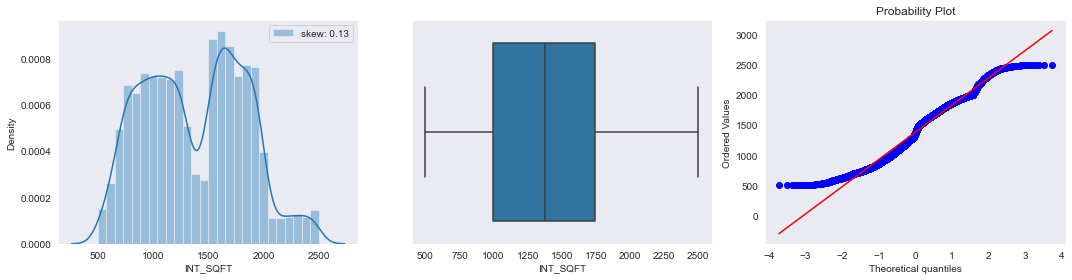

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


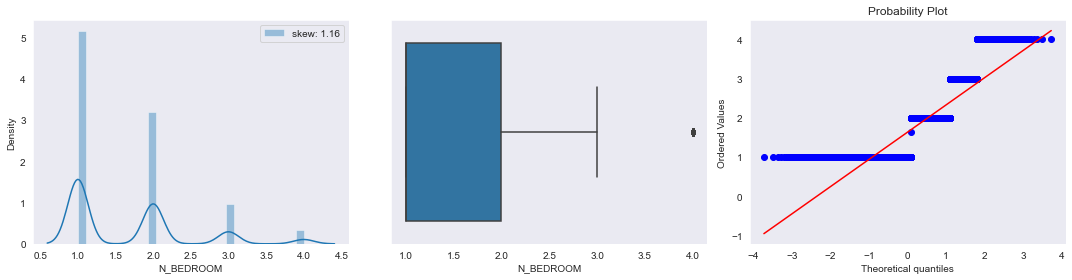

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


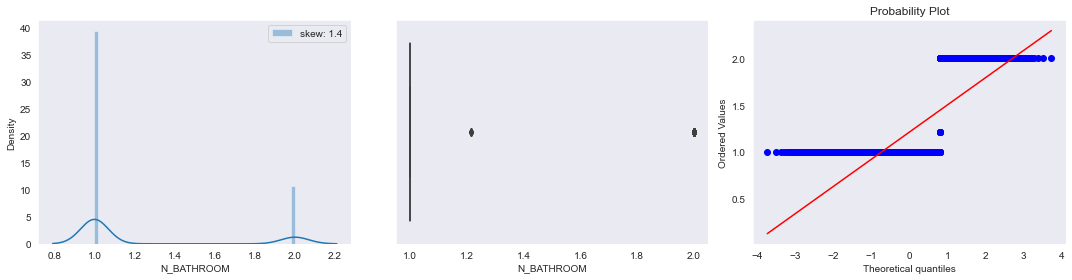

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


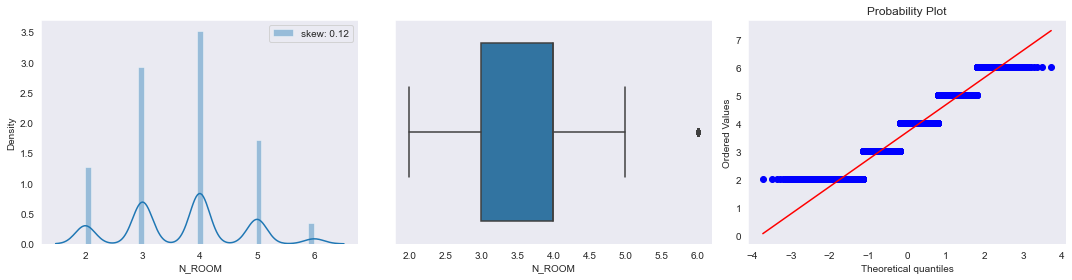

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


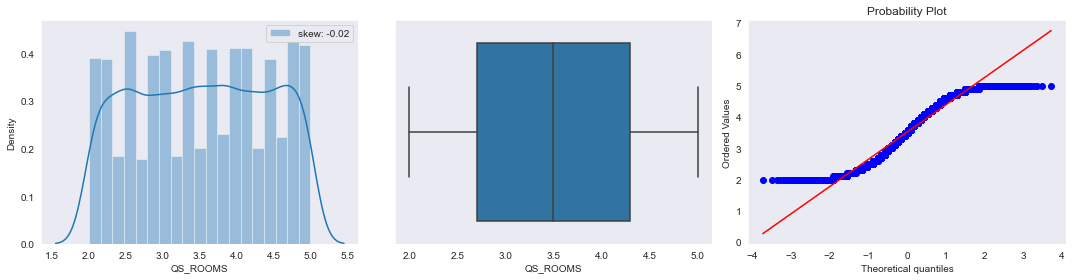

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


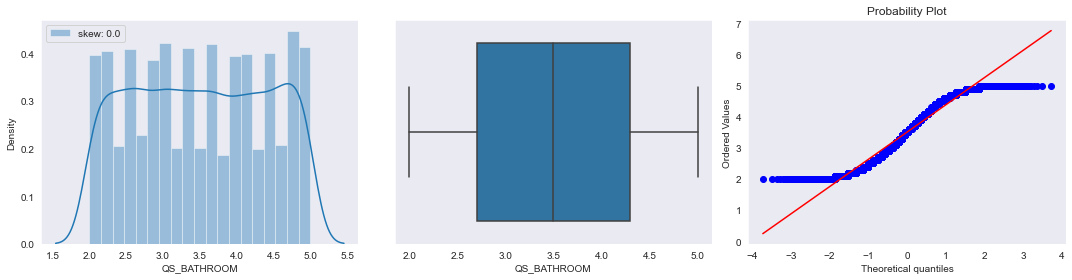

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


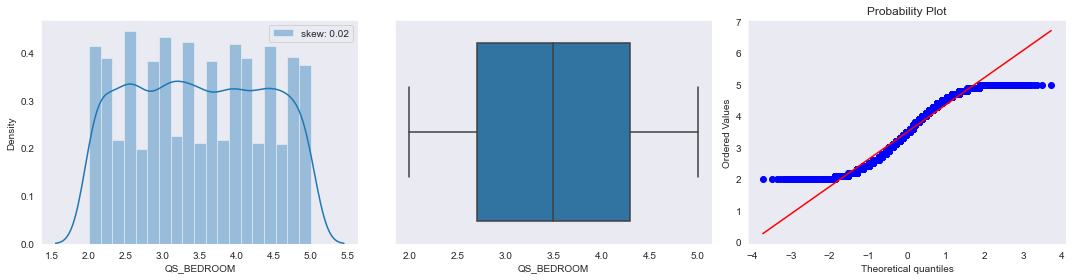

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


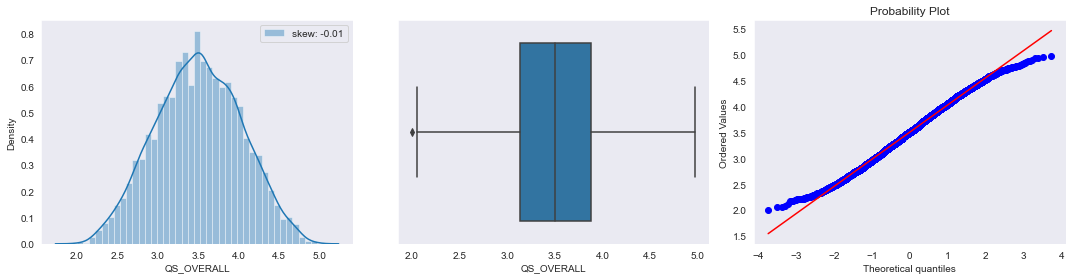

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


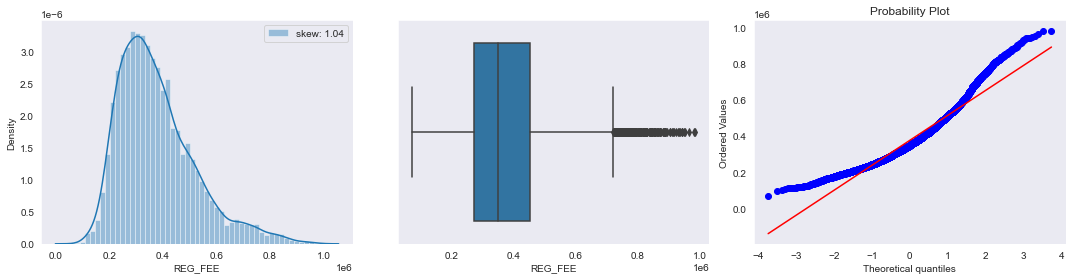

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


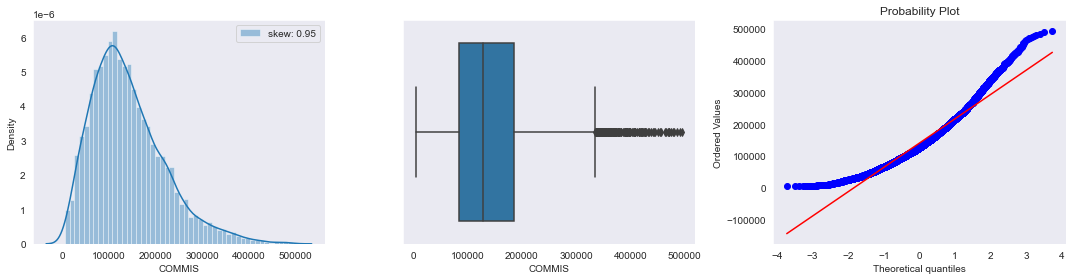

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


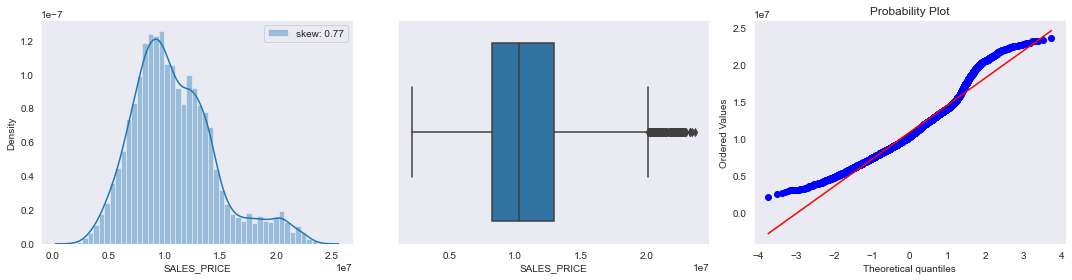

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


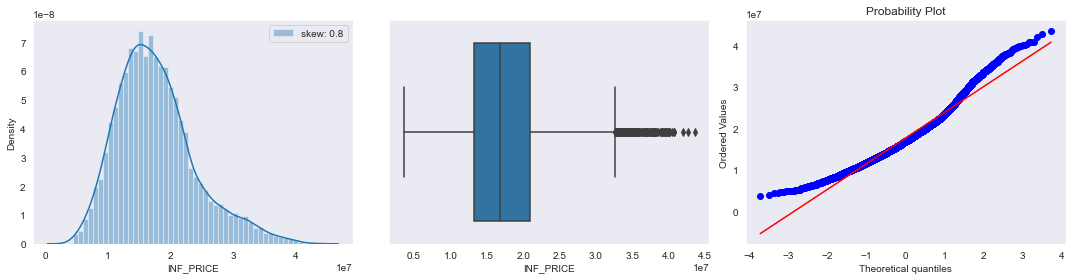

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


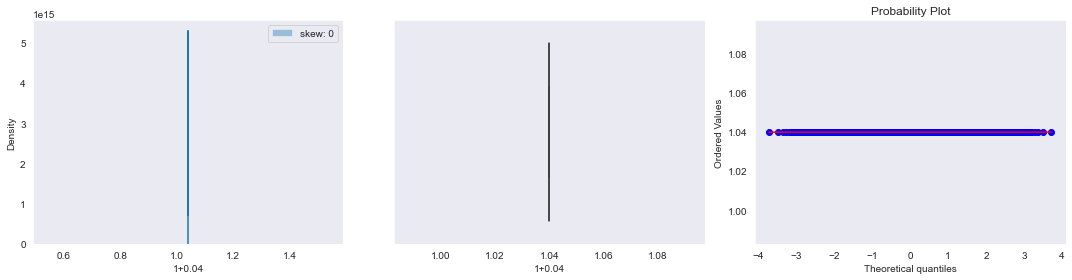

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


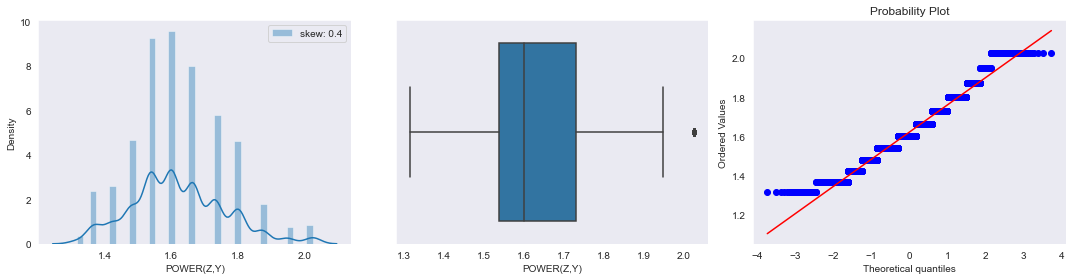

In [33]:
sns.set_style('dark')
for col in x_numeric.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(x_numeric[col], label="skew: " + str(np.round(x_numeric[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(x_numeric[col])
    plt.subplot(133)
    stats.probplot(x_numeric[col], plot=plt)
    plt.tight_layout()
    plt.show()

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


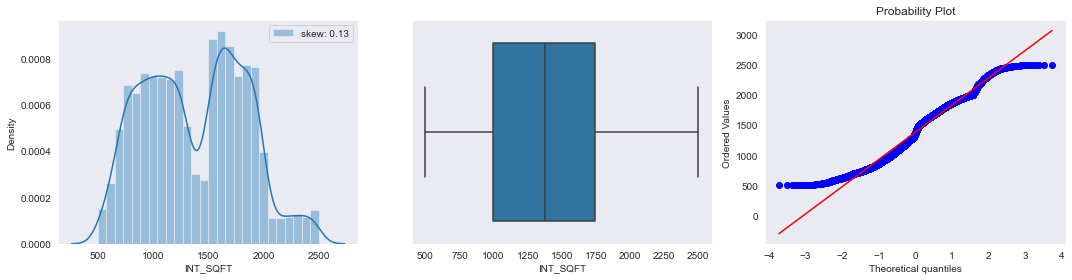

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


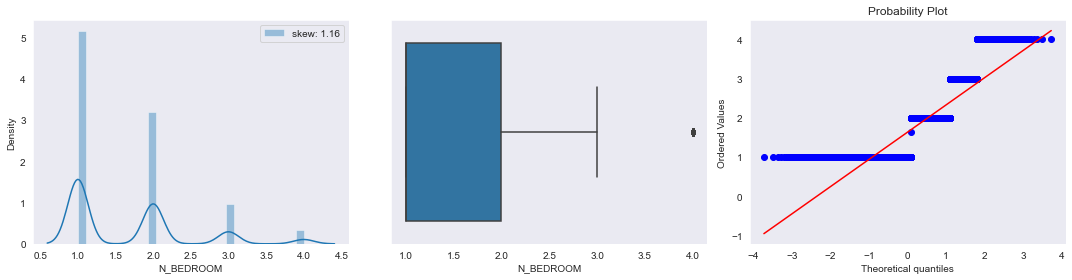

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


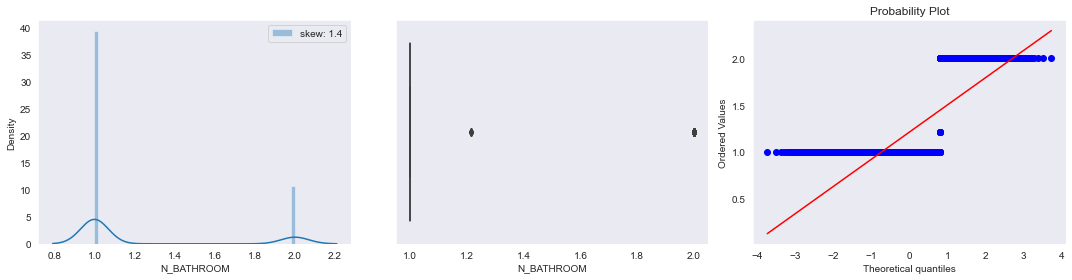

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


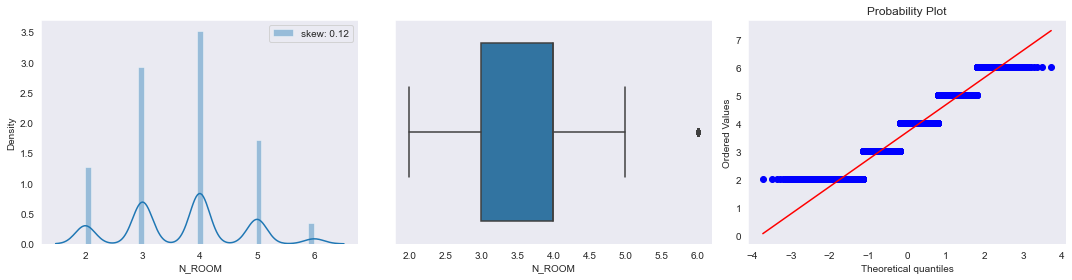

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


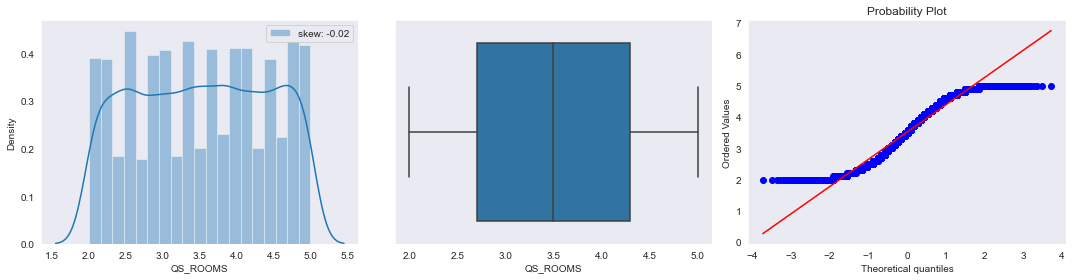

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


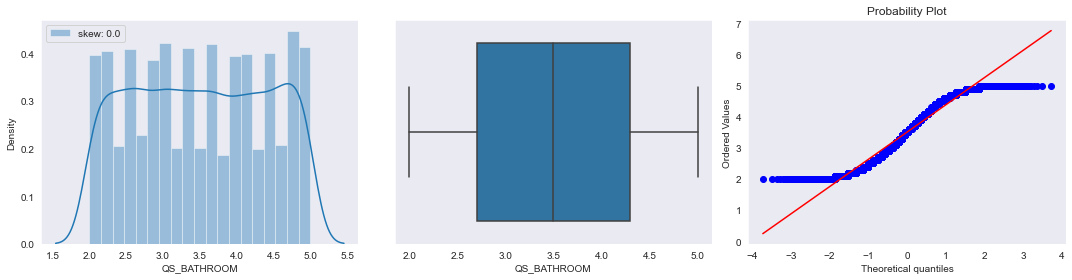

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


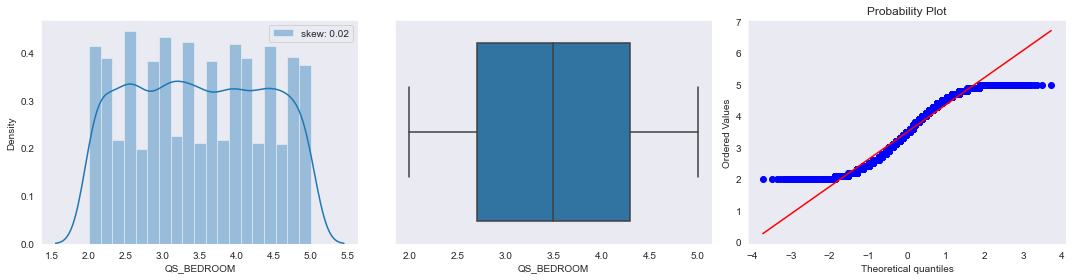

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


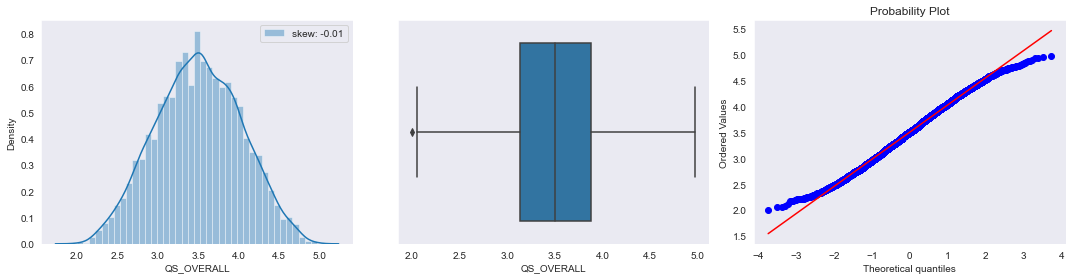

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


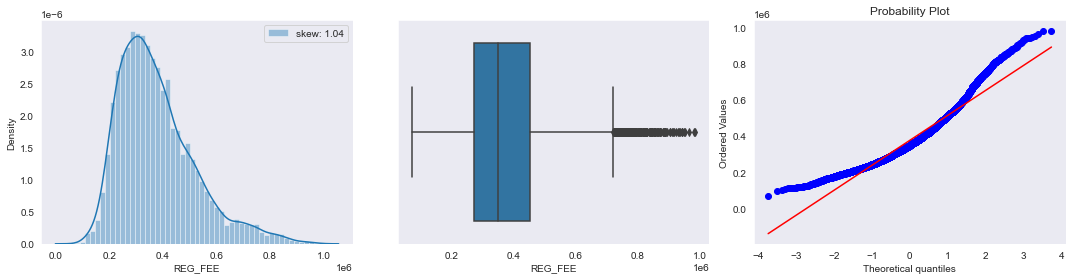

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


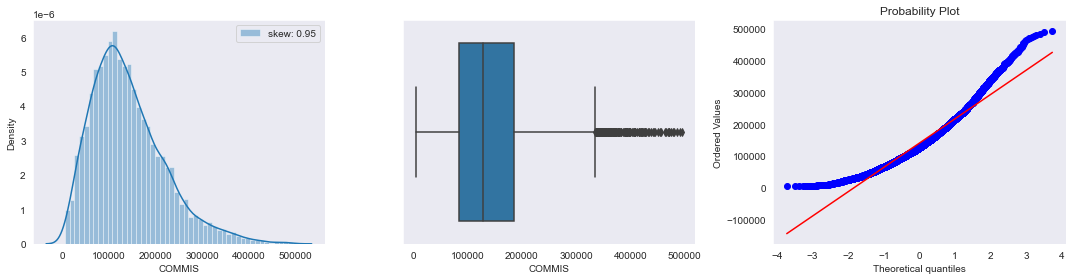

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


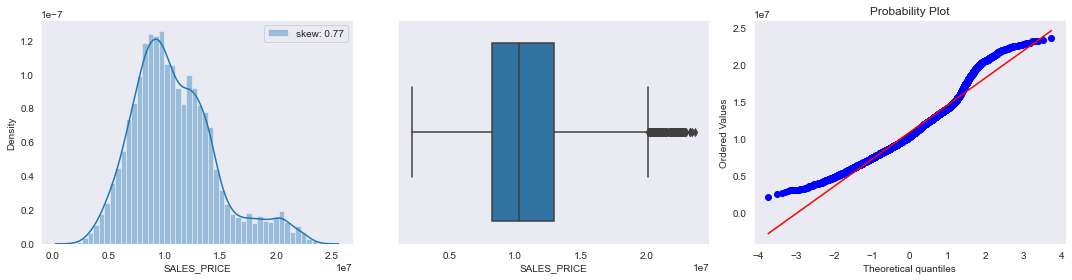

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


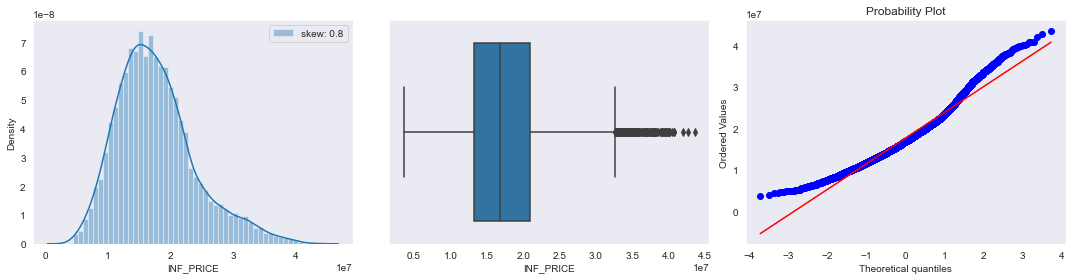

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


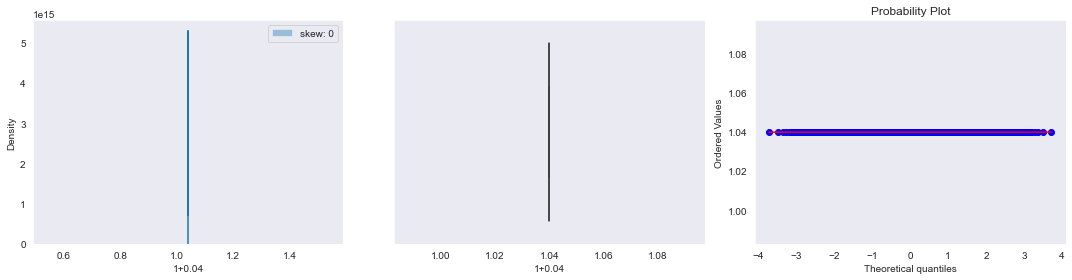

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


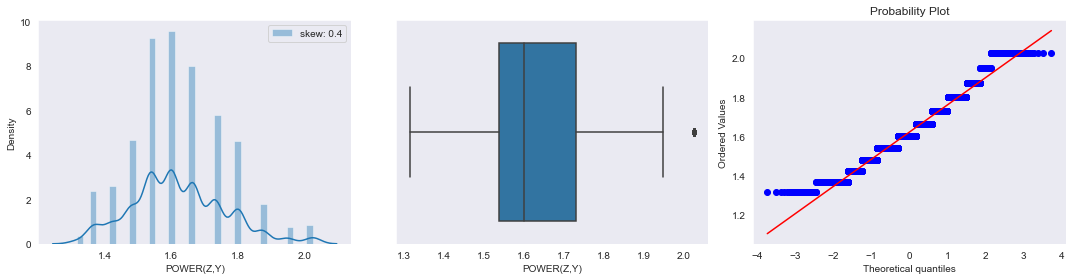

In [34]:
sns.set_style('dark')
for cols in x_numeric.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(x_numeric[cols], label="skew: " + str(np.round(x_numeric[cols].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(x_numeric[cols])
    plt.subplot(133)
    stats.probplot(x_numeric[cols], plot=plt)
    plt.tight_layout()
    plt.show()

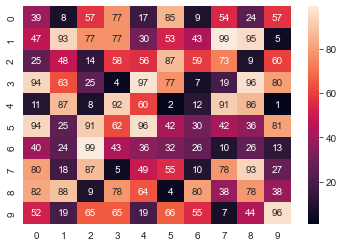

In [35]:
data = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))
  
# setting the parameter values
annot = True
  
# plotting the heatmap
hm = sns.heatmap(data=data,
                annot=annot)
  
# displaying the plotted heatmap
plt.show()

In [36]:
cor = x_numeric.corr()
cor

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)"
INT_SQFT,1.000000,0.786340,0.515261,0.951279,0.019850,-0.008337,0.008865,0.013989,0.657544,0.571076,0.612125,0.618143,NaN,0.128482
N_BEDROOM,0.786340,1.000000,0.755055,0.840280,0.015109,-0.007635,0.015566,0.014172,0.455351,0.430418,0.330999,0.366842,NaN,0.185141
N_BATHROOM,0.515261,0.755055,1.000000,0.568564,0.013108,-0.012055,0.013190,0.007877,0.260249,0.256453,0.108865,0.134643,NaN,0.099627
N_ROOM,0.951279,0.840280,0.568564,1.000000,0.016524,-0.007545,0.015072,0.015418,0.630932,0.533343,0.602760,0.606139,NaN,0.114103
QS_ROOMS,0.019850,0.015109,0.013108,0.016524,1.000000,0.008828,0.007789,0.516147,0.019739,0.009377,0.021967,0.020657,NaN,-0.002269
QS_BATHROOM,-0.008337,-0.007635,-0.012055,-0.007545,0.008828,1.000000,-0.011745,0.549056,-0.006719,-0.000471,-0.011377,-0.012538,NaN,0.001149
QS_BEDROOM,0.008865,0.015566,0.013190,0.015072,0.007789,-0.011745,1.000000,0.628168,0.021526,0.020118,0.018804,0.017153,NaN,-0.002815
QS_OVERALL,0.013989,0.014172,0.007877,0.015418,0.516147,0.549056,0.628168,1.000000,0.022410,0.016946,0.020485,0.019022,NaN,0.000985
REG_FEE,0.657544,0.455351,0.260249,0.630932,0.019739,-0.006719,0.021526,0.022410,1.000000,0.659903,0.878148,0.853464,NaN,0.031275
COMMIS,0.571076,0.430418,0.256453,0.533343,0.009377,-0.000471,0.020118,0.016946,0.659903,1.000000,0.626275,0.603444,NaN,0.000354


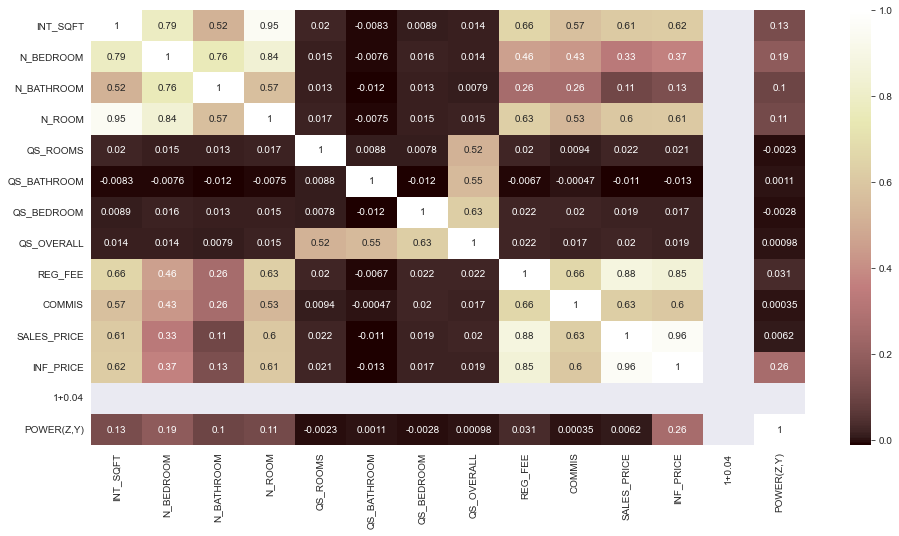

In [37]:
# FINIDING UNNESSCARY FEATURES 
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="pink", annot=True)
plt.show()

In [38]:
cor.nlargest(16, 'SALES_PRICE').index

Index(['SALES_PRICE', 'INF_PRICE', 'REG_FEE', 'COMMIS', 'INT_SQFT', 'N_ROOM',
       'N_BEDROOM', 'N_BATHROOM', 'QS_ROOMS', 'QS_OVERALL', 'QS_BEDROOM',
       'POWER(Z,Y)', 'QS_BATHROOM'],
      dtype='object')

In [39]:
x.N_BEDROOM.describe()

count    7109.000000
mean        1.637029
std         0.802845
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [40]:
x["N_BEDROOM_n"]=np.where(x['N_BEDROOM']>=2.0,2.0,x["N_BEDROOM"])
x["N_BEDROOM_n"]

0       2.0
1       2.0
2       2.0
3       1.0
4       2.0
       ... 
7104    1.0
7105    1.0
7106    2.0
7107    1.0
7108    2.0
Name: N_BEDROOM_n, Length: 7109, dtype: float64

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='N_BEDROOM_n'>

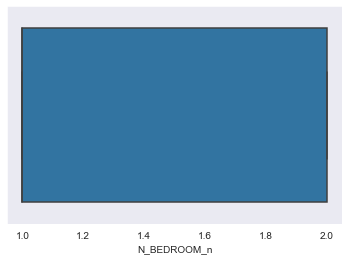

In [41]:
sns.boxplot(x['N_BEDROOM_n'])

In [42]:
x_category = x.select_dtypes(include=['object'])
x_category.columns

Index(['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE'],
      dtype='object')

In [43]:
x_dummy=pd.get_dummies(x_category,drop_first=True)
x_dummy.head()

,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,SALE_COND_Adj Land,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,...,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSewer,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,1,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
x_dummy.shape

(7109, 22)

In [45]:
XX=x.drop(list(x_category.columns), axis=1)
XX
#New_car

,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)",N_BEDROOM_n
0,1986,2006-12-19,2.0,1.0,5,1995-12-22,4.9,4.2,2.5,3.765,760122,304049,21717770,4.067698e+07,1.04,1.872981,2.0
1,1855,2010-03-13,3.0,2.0,5,1988-03-18,4.7,3.9,3.6,4.010,356321,77042,9630290,1.541840e+07,1.04,1.601032,2.0
2,1220,2014-11-09,2.0,1.0,4,2009-12-09,4.5,2.6,3.1,3.320,409027,198316,12394750,1.696307e+07,1.04,1.368569,2.0
3,1167,2007-05-04,1.0,1.0,3,1979-12-04,3.6,2.1,2.5,2.670,263152,33955,8488790,1.528783e+07,1.04,1.800944,1.0
4,1847,2006-03-13,3.0,2.0,5,1996-03-15,2.4,4.5,2.1,3.260,604809,235204,16800250,3.146655e+07,1.04,1.872981,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1733,2010-02-24,1.0,1.0,4,1985-02-03,3.4,3.7,2.1,2.890,702058,312026,19501600,3.122269e+07,1.04,1.601032,1.0
7105,666,2010-11-05,1.0,1.0,2,1974-05-20,3.2,4.4,2.5,3.280,273317,74541,6211750,9.945212e+06,1.04,1.601032,1.0
7106,1897,2004-08-04,3.0,2.0,5,1995-11-04,3.6,4.5,3.3,3.920,346191,205551,10818480,2.191626e+07,1.04,2.025817,2.0
7107,787,2009-03-08,1.0,1.0,2,1977-11-08,4.6,3.8,4.1,4.160,425350,119098,8507000,1.416478e+07,1.04,1.665074,1.0


In [46]:
XX.columns

Index(['INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'DATE_BUILD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'REG_FEE', 'COMMIS', 'SALES_PRICE', 'INF_PRICE', '1+0.04', 'POWER(Z,Y)',
       'N_BEDROOM_n'],
      dtype='object')

In [47]:
X = pd.concat([XX,x_dummy] ,axis=1)
X

,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,...,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSewer,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1986,2006-12-19,2.0,1.0,5,1995-12-22,4.9,4.2,2.5,3.765,...,0,0,0,0,0,0,0,1,0,0
1,1855,2010-03-13,3.0,2.0,5,1988-03-18,4.7,3.9,3.6,4.010,...,1,0,1,0,1,0,1,0,0,0
2,1220,2014-11-09,2.0,1.0,4,2009-12-09,4.5,2.6,3.1,3.320,...,0,0,1,1,0,0,0,1,0,0
3,1167,2007-05-04,1.0,1.0,3,1979-12-04,3.6,2.1,2.5,2.670,...,1,0,0,1,0,0,0,0,1,0
4,1847,2006-03-13,3.0,2.0,5,1996-03-15,2.4,4.5,2.1,3.260,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1733,2010-02-24,1.0,1.0,4,1985-02-03,3.4,3.7,2.1,2.890,...,0,0,1,1,0,0,0,0,1,0
7105,666,2010-11-05,1.0,1.0,2,1974-05-20,3.2,4.4,2.5,3.280,...,1,1,0,0,0,0,1,0,0,0
7106,1897,2004-08-04,3.0,2.0,5,1995-11-04,3.6,4.5,3.3,3.920,...,1,0,1,1,0,0,0,1,0,0
7107,787,2009-03-08,1.0,1.0,2,1977-11-08,4.6,3.8,4.1,4.160,...,0,1,0,0,1,0,0,0,1,0


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   INT_SQFT                7109 non-null   int64         
 1   DATE_SALE               7109 non-null   datetime64[ns]
 2   N_BEDROOM               7109 non-null   float64       
 3   N_BATHROOM              7109 non-null   float64       
 4   N_ROOM                  7109 non-null   int64         
 5   DATE_BUILD              7109 non-null   datetime64[ns]
 6   QS_ROOMS                7109 non-null   float64       
 7   QS_BATHROOM             7109 non-null   float64       
 8   QS_BEDROOM              7109 non-null   float64       
 9   QS_OVERALL              7109 non-null   float64       
 10  REG_FEE                 7109 non-null   int64         
 11  COMMIS                  7109 non-null   int64         
 12  SALES_PRICE             7109 non-null   int64   

In [49]:
X

,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,...,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSewer,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1986,2006-12-19,2.0,1.0,5,1995-12-22,4.9,4.2,2.5,3.765,...,0,0,0,0,0,0,0,1,0,0
1,1855,2010-03-13,3.0,2.0,5,1988-03-18,4.7,3.9,3.6,4.010,...,1,0,1,0,1,0,1,0,0,0
2,1220,2014-11-09,2.0,1.0,4,2009-12-09,4.5,2.6,3.1,3.320,...,0,0,1,1,0,0,0,1,0,0
3,1167,2007-05-04,1.0,1.0,3,1979-12-04,3.6,2.1,2.5,2.670,...,1,0,0,1,0,0,0,0,1,0
4,1847,2006-03-13,3.0,2.0,5,1996-03-15,2.4,4.5,2.1,3.260,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1733,2010-02-24,1.0,1.0,4,1985-02-03,3.4,3.7,2.1,2.890,...,0,0,1,1,0,0,0,0,1,0
7105,666,2010-11-05,1.0,1.0,2,1974-05-20,3.2,4.4,2.5,3.280,...,1,1,0,0,0,0,1,0,0,0
7106,1897,2004-08-04,3.0,2.0,5,1995-11-04,3.6,4.5,3.3,3.920,...,1,0,1,1,0,0,0,1,0,0
7107,787,2009-03-08,1.0,1.0,2,1977-11-08,4.6,3.8,4.1,4.160,...,0,1,0,0,1,0,0,0,1,0


In [50]:
X=X.drop(['DATE_SALE','DATE_BUILD'],axis=1)

In [51]:
# FINDING MULTICOLLINEARITY BY USING VIF
# FINDING R^2 

import statsmodels.api as sm
features=list(X.columns)
for i in range(1, len(X.columns)):
    x=X.loc[:,X.columns!=features[i]]
    y=X.loc[:,X.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Sqr value of N_BEDROOM is 0.9391782423203082
VIF for N_BEDROOM is 16.44
R-Sqr value of N_BATHROOM is 0.7434932011040226
VIF for N_BATHROOM is 3.9
R-Sqr value of N_ROOM is 0.9560766355727099
VIF for N_ROOM is 22.77
R-Sqr value of QS_ROOMS is 0.8676682096607967
VIF for QS_ROOMS is 7.56
R-Sqr value of QS_BATHROOM is 0.8863200097269155
VIF for QS_BATHROOM is 8.8
R-Sqr value of QS_BEDROOM is 0.910464429049996
VIF for QS_BEDROOM is 11.17
R-Sqr value of QS_OVERALL is 0.9608733557771044
VIF for QS_OVERALL is 25.56
R-Sqr value of REG_FEE is 0.8640980649966425
VIF for REG_FEE is 7.36
R-Sqr value of COMMIS is 0.5456044498636212
VIF for COMMIS is 2.2
R-Sqr value of SALES_PRICE is 0.9946260800632775
VIF for SALES_PRICE is 186.08
R-Sqr value of INF_PRICE is 0.9939170621562662
VIF for INF_PRICE is 164.39
R-Sqr value of 1+0.04 is 0.9994610743306462
VIF for 1+0.04 is 1855.54
R-Sqr value of POWER(Z,Y) is 0.91970692074636
VIF for POWER(Z,Y) is 12.45
R-Sqr value of N_BEDROOM_n is 0.7830838198302092
VIF 

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   INT_SQFT                7109 non-null   int64  
 1   N_BEDROOM               7109 non-null   float64
 2   N_BATHROOM              7109 non-null   float64
 3   N_ROOM                  7109 non-null   int64  
 4   QS_ROOMS                7109 non-null   float64
 5   QS_BATHROOM             7109 non-null   float64
 6   QS_BEDROOM              7109 non-null   float64
 7   QS_OVERALL              7109 non-null   float64
 8   REG_FEE                 7109 non-null   int64  
 9   COMMIS                  7109 non-null   int64  
 10  SALES_PRICE             7109 non-null   int64  
 11  INF_PRICE               7109 non-null   float64
 12  1+0.04                  7109 non-null   float64
 13  POWER(Z,Y)              7109 non-null   float64
 14  N_BEDROOM_n             7109 non-null   

In [53]:
Y = X['SALES_PRICE']
X = X.drop('SALES_PRICE', axis = 1)

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=42)


In [55]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4976, 36), (4976,), (2133, 36), (2133,))

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression()

In [57]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris



from sklearn.feature_selection import RFECV





rfecv = RFECV(estimator=LinearRegression(),step=1,cv=4,scoring='r2')


rfecv.fit(x_train,y_train)

RFECV(cv=4, estimator=LinearRegression(), scoring='r2')

In [58]:
print('no.of features:',rfecv.n_features_)
print('features:', x_train.columns[rfecv.support_])

no.of features: 35
features: Index(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'INF_PRICE', 'POWER(Z,Y)', 'N_BEDROOM_n', 'AREA_Anna Nagar',
       'AREA_Chrompet', 'AREA_KK Nagar', 'AREA_Karapakkam', 'AREA_T Nagar',
       'AREA_Velachery', 'SALE_COND_Adj Land', 'SALE_COND_Family',
       'SALE_COND_Normal Sale', 'SALE_COND_Partial', 'PARK_FACIL_Yes',
       'BUILDTYPE_House', 'BUILDTYPE_Others', 'UTILITY_AVAIL_ELO',
       'UTILITY_AVAIL_NoSewer ', 'STREET_No Access', 'STREET_Paved',
       'MZZONE_C', 'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM'],
      dtype='object')


In [59]:
lm = LinearRegression()
lm= lm.fit(x_train, y_train)

print("Trainign R-sqaured:", lm.score(x_train, y_train))
print("Testing R-squared:",lm.score(x_test, y_test))

Trainign R-sqaured: 0.9945300670661184
Testing R-squared: 0.994793724087213


In [60]:

from sklearn.feature_selection import RFECV

lr = LinearRegression()
lr_baseline_model=lr.fit(x_train,y_train)



rfecv=RFECV(estimator=lr,step=1,cv=3,scoring='neg_mean_squared_error')
rfecv=rfecv.fit(x_train,y_train)
print('no. of features:',rfecv.n_features_)
print('features:', x_train.columns[rfecv.support_])

no. of features: 35
features: Index(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'INF_PRICE', 'POWER(Z,Y)', 'N_BEDROOM_n', 'AREA_Anna Nagar',
       'AREA_Chrompet', 'AREA_KK Nagar', 'AREA_Karapakkam', 'AREA_T Nagar',
       'AREA_Velachery', 'SALE_COND_Adj Land', 'SALE_COND_Family',
       'SALE_COND_Normal Sale', 'SALE_COND_Partial', 'PARK_FACIL_Yes',
       'BUILDTYPE_House', 'BUILDTYPE_Others', 'UTILITY_AVAIL_ELO',
       'UTILITY_AVAIL_NoSewer ', 'STREET_No Access', 'STREET_Paved',
       'MZZONE_C', 'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM'],
      dtype='object')


In [61]:
rfecv.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [62]:
print("score for lr", lr.score(x_test,y_test))


print("score for rfecv",rfecv.score(x_test,y_test))


score for lr 0.994793724087213
score for rfecv 0.9947937240873909


In [63]:
from sklearn.feature_selection import RFECV 
estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(x_train,y_train)

In [64]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [65]:
print('no.of features:',selector.n_features_)
#print('features:', x_train.columns[selector.support_])

no.of features: 35


In [66]:
lr = LinearRegression()
_ = lr.fit(x_train, y_train)

print("Trainign R-sqaured:", lr.score(x_train, y_train))
print("Testing R-squared:",lr.score(x_test, y_test))

Trainign R-sqaured: 0.9945300670661184
Testing R-squared: 0.994793724087213


In [67]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
classifier = LinearRegression()
rfe = RFE(classifier, n_features_to_select= None)
rfe = rfe.fit(x_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
x_train.columns[rfe.support_]

print(len(rfe.support_))

[False False False  True False False False False False False False False
 False False  True  True  True  True  True  True  True False False False
  True  True  True False False  True  True  True  True  True  True  True]
[15 14 11  1  8  9 10  7 16 18 17 19  6 13  1  1  1  1  1  1  1  5 12  2
  1  1  1  3  4  1  1  1  1  1  1  1]
36


In [68]:
rfe.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True])

In [69]:
features = x_train.columns[rfe.get_support()]
features

Index(['N_ROOM', 'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar',
       'AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery',
       'SALE_COND_Adj Land', 'PARK_FACIL_Yes', 'BUILDTYPE_House',
       'BUILDTYPE_Others', 'STREET_No Access', 'STREET_Paved', 'MZZONE_C',
       'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM'],
      dtype='object')

In [70]:
len(features)

18

In [71]:
classifier = LinearRegression().fit(x_train,y_train)

print("score for lr", classifier.score(x_test,y_test))


print("score for rfecv",rfe.score(x_test,y_test))


score for lr 0.994793724087213
score for rfecv 0.9400383516183617


In [72]:
### step forward selection

In [73]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

lm = LinearRegression()

lm.fit(x_train,y_train)


sfs1 = sfs(lm,k_features = 31,forward=True,floating=False, verbose=2,scoring='explained_variance',cv=5) 
#sfs1 = sfs(lm,k_features = 36,forward=True,floating=False, verbose=2,scoring='r2',cv=5) 

sfs1 = sfs1.fit(x_train, y_train)

sfs1.k_feature_names_


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.5s finished

[2022-05-06 20:11:50] Features: 1/31 -- score: 0.9251789454011066[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished

[2022-05-06 20:11:50] Features: 2/31 -- score: 0.9929926525245044[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.4s finished

[2022-05-06 20:11:51] Features: 3/31 -- score: 0.9932144048219269[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

('INT_SQFT',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_OVERALL',
 'REG_FEE',
 'COMMIS',
 'INF_PRICE',
 'POWER(Z,Y)',
 'N_BEDROOM_n',
 'AREA_Anna Nagar',
 'AREA_Chrompet',
 'AREA_KK Nagar',
 'AREA_Karapakkam',
 'AREA_T Nagar',
 'AREA_Velachery',
 'SALE_COND_Adj Land',
 'SALE_COND_Family',
 'SALE_COND_Partial',
 'PARK_FACIL_Yes',
 'BUILDTYPE_House',
 'BUILDTYPE_Others',
 'UTILITY_AVAIL_ELO',
 'UTILITY_AVAIL_NoSewer ',
 'STREET_No Access',
 'STREET_Paved',
 'MZZONE_C',
 'MZZONE_I',
 'MZZONE_RH',
 'MZZONE_RL',
 'MZZONE_RM')

In [74]:
sfs1.k_feature_names_

('INT_SQFT',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_OVERALL',
 'REG_FEE',
 'COMMIS',
 'INF_PRICE',
 'POWER(Z,Y)',
 'N_BEDROOM_n',
 'AREA_Anna Nagar',
 'AREA_Chrompet',
 'AREA_KK Nagar',
 'AREA_Karapakkam',
 'AREA_T Nagar',
 'AREA_Velachery',
 'SALE_COND_Adj Land',
 'SALE_COND_Family',
 'SALE_COND_Partial',
 'PARK_FACIL_Yes',
 'BUILDTYPE_House',
 'BUILDTYPE_Others',
 'UTILITY_AVAIL_ELO',
 'UTILITY_AVAIL_NoSewer ',
 'STREET_No Access',
 'STREET_Paved',
 'MZZONE_C',
 'MZZONE_I',
 'MZZONE_RH',
 'MZZONE_RL',
 'MZZONE_RM')

In [75]:
sfs1.k_feature_idx_

(0,
 1,
 2,
 3,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35)

In [76]:
len(sfs1.k_feature_idx_)

31

In [77]:
sfs1.k_score_

0.9944289214892565

In [78]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.9161931210176504, 0.9325332134363805, 0.923...",0.925179,"(INF_PRICE,)",0.00685,0.005329,0.002665
2,"(10, 12)","[0.9926223403144697, 0.9936163470060837, 0.992...",0.992993,"(INF_PRICE, POWER(Z,Y))",0.000552,0.000429,0.000215
3,"(10, 12, 17)","[0.9927747536022705, 0.9939391657719121, 0.992...",0.993214,"(INF_PRICE, POWER(Z,Y), AREA_Karapakkam)",0.000577,0.000449,0.000224
4,"(8, 10, 12, 17)","[0.9929615545020354, 0.9941988238391622, 0.992...",0.993429,"(REG_FEE, INF_PRICE, POWER(Z,Y), AREA_Karapakkam)",0.000622,0.000484,0.000242
5,"(8, 10, 12, 14, 17)","[0.9931739910597936, 0.9942869351672687, 0.993...",0.993577,"(REG_FEE, INF_PRICE, POWER(Z,Y), AREA_Anna Nag...",0.000573,0.000446,0.000223
6,"(8, 10, 12, 14, 17, 18)","[0.9933204341471698, 0.9943349537604166, 0.993...",0.993678,"(REG_FEE, INF_PRICE, POWER(Z,Y), AREA_Anna Nag...",0.000551,0.000429,0.000214
7,"(8, 10, 12, 14, 16, 17, 18)","[0.9933600192570798, 0.9943882806049448, 0.993...",0.993724,"(REG_FEE, INF_PRICE, POWER(Z,Y), AREA_Anna Nag...",0.000558,0.000434,0.000217
8,"(8, 9, 10, 12, 14, 16, 17, 18)","[0.9933225921353048, 0.9943575838110182, 0.993...",0.99376,"(REG_FEE, COMMIS, INF_PRICE, POWER(Z,Y), AREA_...",0.000536,0.000417,0.000208
9,"(0, 8, 9, 10, 12, 14, 16, 17, 18)","[0.9933456958985467, 0.9944117007720308, 0.993...",0.993781,"(INT_SQFT, REG_FEE, COMMIS, INF_PRICE, POWER(Z...",0.000537,0.000418,0.000209
10,"(0, 8, 9, 10, 12, 14, 16, 17, 18, 25)","[0.993358000129581, 0.9944551858625318, 0.9933...",0.993812,"(INT_SQFT, REG_FEE, COMMIS, INF_PRICE, POWER(Z...",0.000537,0.000418,0.000209


In [79]:
sfs1.k_score_

0.9944289214892565

In [80]:
### step backward selection

In [81]:
from mlxtend.feature_selection import SequentialFeatureSelector as sbs

lm = LinearRegression()

lm.fit(x_train,y_train)


sbs1 = sbs(lm,k_features = 31,forward=False,floating=False, verbose=2,scoring='explained_variance',cv=5)

sbs1 = sbs1.fit(x_train, y_train)

sbs1.k_feature_names_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.5s finished

[2022-05-06 20:12:06] Features: 35/31 -- score: 0.9944224658210971[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.4s finished

[2022-05-06 20:12:07] Features: 34/31 -- score: 0.9944248845355521[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.3s finished

[2022-05-06 20:12:09] Features: 33/31 -- score: 0.9944267073515037[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

('INT_SQFT',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_BEDROOM',
 'REG_FEE',
 'COMMIS',
 'INF_PRICE',
 'POWER(Z,Y)',
 'N_BEDROOM_n',
 'AREA_Anna Nagar',
 'AREA_Chrompet',
 'AREA_KK Nagar',
 'AREA_Karapakkam',
 'AREA_T Nagar',
 'AREA_Velachery',
 'SALE_COND_Adj Land',
 'SALE_COND_Family',
 'SALE_COND_Partial',
 'PARK_FACIL_Yes',
 'BUILDTYPE_House',
 'BUILDTYPE_Others',
 'UTILITY_AVAIL_ELO',
 'UTILITY_AVAIL_NoSewer ',
 'STREET_No Access',
 'STREET_Paved',
 'MZZONE_C',
 'MZZONE_I',
 'MZZONE_RH',
 'MZZONE_RL',
 'MZZONE_RM')

In [82]:
sbs1.k_feature_names_

('INT_SQFT',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_BEDROOM',
 'REG_FEE',
 'COMMIS',
 'INF_PRICE',
 'POWER(Z,Y)',
 'N_BEDROOM_n',
 'AREA_Anna Nagar',
 'AREA_Chrompet',
 'AREA_KK Nagar',
 'AREA_Karapakkam',
 'AREA_T Nagar',
 'AREA_Velachery',
 'SALE_COND_Adj Land',
 'SALE_COND_Family',
 'SALE_COND_Partial',
 'PARK_FACIL_Yes',
 'BUILDTYPE_House',
 'BUILDTYPE_Others',
 'UTILITY_AVAIL_ELO',
 'UTILITY_AVAIL_NoSewer ',
 'STREET_No Access',
 'STREET_Paved',
 'MZZONE_C',
 'MZZONE_I',
 'MZZONE_RH',
 'MZZONE_RL',
 'MZZONE_RM')

In [83]:
sbs1.k_feature_idx_

(0,
 1,
 2,
 3,
 6,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35)

In [84]:
sbs1.k_score_

0.9944281389790037

In [85]:
pd.DataFrame.from_dict(sbs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
36,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9939999756344856, 0.9950907878137406, 0.993...",0.99442,"(INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOM, QS_R...",0.000548,0.000427,0.000213
35,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9940011081877312, 0.9950932412626683, 0.993...",0.994422,"(INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOM, QS_R...",0.000547,0.000426,0.000213
34,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[0.9940097568197274, 0.9950924147238344, 0.993...",0.994425,"(INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOM, QS_R...",0.000545,0.000424,0.000212
33,"(0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...","[0.9940103754061408, 0.9950943766588941, 0.993...",0.994427,"(INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOM, QS_B...",0.000543,0.000423,0.000211
32,"(0, 1, 2, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15, ...","[0.994011348645621, 0.9950972747246187, 0.9939...",0.994428,"(INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOM, QS_B...",0.000545,0.000424,0.000212
31,"(0, 1, 2, 3, 6, 8, 9, 10, 12, 13, 14, 15, 16, ...","[0.9940113486456332, 0.9950972747245682, 0.993...",0.994428,"(INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOM, QS_B...",0.000545,0.000424,0.000212


In [86]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
classifier = LinearRegression()

rfe = RFE(classifier, n_features_to_select= None)
rfe = rfe.fit(x_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
x_train.columns[rfe.support_]

print(len(rfe.support_))

[False False False  True False False False False False False False False
 False False  True  True  True  True  True  True  True False False False
  True  True  True False False  True  True  True  True  True  True  True]
[15 14 11  1  8  9 10  7 16 18 17 19  6 13  1  1  1  1  1  1  1  5 12  2
  1  1  1  3  4  1  1  1  1  1  1  1]
36


In [87]:
rfe.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True])

In [88]:
features = x_train.columns[rfe.get_support()]
features

Index(['N_ROOM', 'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar',
       'AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery',
       'SALE_COND_Adj Land', 'PARK_FACIL_Yes', 'BUILDTYPE_House',
       'BUILDTYPE_Others', 'STREET_No Access', 'STREET_Paved', 'MZZONE_C',
       'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM'],
      dtype='object')

In [89]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 4420 to 860
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   INT_SQFT                4976 non-null   int64  
 1   N_BEDROOM               4976 non-null   float64
 2   N_BATHROOM              4976 non-null   float64
 3   N_ROOM                  4976 non-null   int64  
 4   QS_ROOMS                4976 non-null   float64
 5   QS_BATHROOM             4976 non-null   float64
 6   QS_BEDROOM              4976 non-null   float64
 7   QS_OVERALL              4976 non-null   float64
 8   REG_FEE                 4976 non-null   int64  
 9   COMMIS                  4976 non-null   int64  
 10  INF_PRICE               4976 non-null   float64
 11  1+0.04                  4976 non-null   float64
 12  POWER(Z,Y)              4976 non-null   float64
 13  N_BEDROOM_n             4976 non-null   float64
 14  AREA_Anna Nagar         4976 non-null 

In [90]:
len(features)

18

In [91]:
model =  LinearRegression().fit(x_train,y_train)

print("score for lr", model.score(x_test,y_test))


print("score for rfecv",rfe.score(x_test,y_test))


score for lr 0.994793724087213
score for rfecv 0.9400383516183617


Feature: 0, Score: 32.71097
Feature: 1, Score: -0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 63.57443
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: 61.53948
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 35.31680
Feature: 14, Score: 0.00000
Feature: 15, Score: 21.13980
Feature: 16, Score: 0.00000
Feature: 17, Score: 68.33792
Feature: 18, Score: 0.00000
Feature: 19, Score: 23.46959
Feature: 20, Score: 0.00000
Feature: 21, Score: -0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: -0.00000
Feature: 24, Score: -0.00000
Feature: 25, Score: -0.00000
Feature: 26, Score: -0.00000
Feature: 27, Score: 52.69365
Feature: 28, Score: -0.00000
Feature: 29, Score: -0.00000
Feature: 30, Score: 34.94610
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 16.92606
Feature: 3

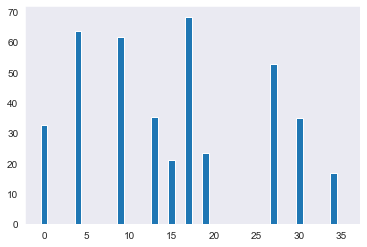

In [92]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, Y = make_regression( n_features=36)
#X, y = make_regression(n_samples=1000, n_features=36, n_informative=5, random_state=1)

# define the model
model = LinearRegression()
# fit the model
model.fit(X, Y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00677
Feature: 1, Score: 0.01272
Feature: 2, Score: 0.14607
Feature: 3, Score: 0.01345
Feature: 4, Score: 0.00832
Feature: 5, Score: 0.00552
Feature: 6, Score: 0.10538
Feature: 7, Score: 0.05608
Feature: 8, Score: 0.00784
Feature: 9, Score: 0.00610
Feature: 10, Score: 0.00778
Feature: 11, Score: 0.01342
Feature: 12, Score: 0.00726
Feature: 13, Score: 0.00749
Feature: 14, Score: 0.01208
Feature: 15, Score: 0.16055
Feature: 16, Score: 0.12769
Feature: 17, Score: 0.01771
Feature: 18, Score: 0.00924
Feature: 19, Score: 0.00650
Feature: 20, Score: 0.01111
Feature: 21, Score: 0.00838
Feature: 22, Score: 0.00989
Feature: 23, Score: 0.01189
Feature: 24, Score: 0.01082
Feature: 25, Score: 0.01527
Feature: 26, Score: 0.00811
Feature: 27, Score: 0.01224
Feature: 28, Score: 0.01558
Feature: 29, Score: 0.00731
Feature: 30, Score: 0.00825
Feature: 31, Score: 0.00994
Feature: 32, Score: 0.01000
Feature: 33, Score: 0.01044
Feature: 34, Score: 0.01068
Feature: 35, Score: 0.10213


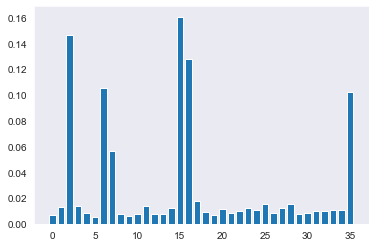

In [93]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset


X, y = make_regression( n_features=36)

#X, Y = make_regression( n_features=36)

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [94]:
type(X)

numpy.ndarray

In [95]:
X=pd.DataFrame(X)

In [96]:
X

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-1.582217,-0.464171,-0.436446,-0.916776,0.323170,0.358225,0.086337,-0.287283,1.298994,-2.834528,...,1.753524,1.143162,-2.052486,0.081134,-0.738581,0.475598,0.894891,0.557608,1.124336,-1.377292
1,0.119564,-1.520351,0.055275,0.010442,0.832293,-0.418574,-0.993025,-0.028483,-2.048352,-0.330884,...,0.944977,0.151225,-1.808231,1.120848,2.058757,-0.512120,-0.841670,-0.544833,-0.877339,0.633635
2,-1.221613,-1.161397,-0.924639,1.388930,-1.009357,-2.596182,-1.072115,0.132179,0.011279,-1.273685,...,-0.813423,0.557873,-0.289964,1.283555,-0.869849,0.343379,-1.209200,-2.175601,-1.833630,0.314680
3,0.599499,1.565154,0.837588,0.149203,-0.986062,-1.133260,1.538884,1.039009,0.795701,0.389456,...,0.470914,0.371560,0.168216,0.131612,-0.444458,0.111854,-0.433151,-1.882765,-0.255510,-0.216283
4,0.115248,0.419263,1.113960,-1.341381,-0.561453,-1.778475,-0.363284,-0.376126,-0.365928,-0.371629,...,1.022503,-0.410145,0.439196,-1.753112,0.386233,1.268101,1.601577,-2.151548,0.541384,-0.299488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.125981,1.072109,-1.027118,0.430475,-0.347767,-0.198533,0.790362,-0.386393,-1.093566,0.700002,...,1.351606,0.036425,-0.210105,-0.494161,-0.178720,-1.868989,1.052305,0.293001,-0.242593,-1.453814
96,0.258485,1.732712,-0.427387,0.222551,0.576657,-0.807369,1.351266,-1.108728,-1.756610,0.274646,...,0.281546,0.176505,1.545742,-1.312081,1.057441,-0.533607,0.088045,1.241107,0.884453,2.435101
97,1.121742,0.379371,0.767882,-0.854161,0.107103,0.074755,1.645137,-0.615965,-1.323311,0.100849,...,-0.424917,0.535573,0.597039,2.303645,-0.863122,-2.011338,1.361965,-0.242013,0.469413,1.596922
98,-0.749099,-0.310801,-0.534789,0.538571,0.220430,1.000507,0.317374,0.058205,0.747356,0.275128,...,1.722844,0.449184,0.524931,-1.249562,-0.780203,0.033152,0.266824,0.853431,0.480700,1.009777


In [119]:
#dataframe = pd.DataFrame(data.data,columns = data.feature_names)
 
# Convert entire data frame as string and print
print(X.to_string())

    INT_SQFT  N_BEDROOM  N_BATHROOM    N_ROOM  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL   REG_FEE    COMMIS  INF_PRICE    1+0.04  POWER(Z,Y)  N_BEDROOM_n  AREA_Anna Nagar  AREA_Chrompet  AREA_KK Nagar  AREA_Karapakkam  AREA_T Nagar  AREA_Velachery  SALE_COND_Adj Land  SALE_COND_Family  SALE_COND_Normal Sale  SALE_COND_Partial  PARK_FACIL_Yes  BUILDTYPE_House  BUILDTYPE_Others  UTILITY_AVAIL_ELO  UTILITY_AVAIL_NoSewer   STREET_No Access  STREET_Paved  MZZONE_C  MZZONE_I  MZZONE_RH  MZZONE_RL  MZZONE_RM
0  -1.582217  -0.464171   -0.436446 -0.916776  0.323170     0.358225    0.086337   -0.287283  1.298994 -2.834528   0.288165  0.992567   -0.171477     0.562654         1.779515      -0.324224       0.036827         0.237327      0.494535       -1.112349           -0.203523          1.199053               0.534664          -0.579833       -0.982351         0.289861          1.753524           1.143162               -2.052486          0.081134     -0.738581  0.475598  0.894891   0.55760

In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   INT_SQFT                100 non-null    float64
 1   N_BEDROOM               100 non-null    float64
 2   N_BATHROOM              100 non-null    float64
 3   N_ROOM                  100 non-null    float64
 4   QS_ROOMS                100 non-null    float64
 5   QS_BATHROOM             100 non-null    float64
 6   QS_BEDROOM              100 non-null    float64
 7   QS_OVERALL              100 non-null    float64
 8   REG_FEE                 100 non-null    float64
 9   COMMIS                  100 non-null    float64
 10  INF_PRICE               100 non-null    float64
 11  1+0.04                  100 non-null    float64
 12  POWER(Z,Y)              100 non-null    float64
 13  N_BEDROOM_n             100 non-null    float64
 14  AREA_Anna Nagar         100 non-null    flo

In [98]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 4420 to 860
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   INT_SQFT                4976 non-null   int64  
 1   N_BEDROOM               4976 non-null   float64
 2   N_BATHROOM              4976 non-null   float64
 3   N_ROOM                  4976 non-null   int64  
 4   QS_ROOMS                4976 non-null   float64
 5   QS_BATHROOM             4976 non-null   float64
 6   QS_BEDROOM              4976 non-null   float64
 7   QS_OVERALL              4976 non-null   float64
 8   REG_FEE                 4976 non-null   int64  
 9   COMMIS                  4976 non-null   int64  
 10  INF_PRICE               4976 non-null   float64
 11  1+0.04                  4976 non-null   float64
 12  POWER(Z,Y)              4976 non-null   float64
 13  N_BEDROOM_n             4976 non-null   float64
 14  AREA_Anna Nagar         4976 non-null 

In [99]:
x_train.columns

Index(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'INF_PRICE', '1+0.04', 'POWER(Z,Y)', 'N_BEDROOM_n', 'AREA_Anna Nagar',
       'AREA_Chrompet', 'AREA_KK Nagar', 'AREA_Karapakkam', 'AREA_T Nagar',
       'AREA_Velachery', 'SALE_COND_Adj Land', 'SALE_COND_Family',
       'SALE_COND_Normal Sale', 'SALE_COND_Partial', 'PARK_FACIL_Yes',
       'BUILDTYPE_House', 'BUILDTYPE_Others', 'UTILITY_AVAIL_ELO',
       'UTILITY_AVAIL_NoSewer ', 'STREET_No Access', 'STREET_Paved',
       'MZZONE_C', 'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM'],
      dtype='object')

In [100]:
x_train.shape

(4976, 36)

In [101]:
X.shape

(100, 36)

In [102]:
X.rename(columns = {0:'INT_SQFT', 1:'N_BEDROOM', 2:'N_BATHROOM', 3:'N_ROOM', 4:'QS_ROOMS',
       5:'QS_BATHROOM', 6:'QS_BEDROOM', 7:'QS_OVERALL', 8:'REG_FEE', 9:'COMMIS',
       10:'INF_PRICE',11:'1+0.04', 12:'POWER(Z,Y)', 13:'N_BEDROOM_n', 14:'AREA_Anna Nagar',
       15:'AREA_Chrompet', 16:'AREA_KK Nagar', 17:'AREA_Karapakkam', 18:'AREA_T Nagar',
       19:'AREA_Velachery', 20:'SALE_COND_Adj Land', 21:'SALE_COND_Family',
       22:'SALE_COND_Normal Sale', 23:'SALE_COND_Partial', 24:'PARK_FACIL_Yes',
       25:'BUILDTYPE_House', 26:'BUILDTYPE_Others', 27:'UTILITY_AVAIL_ELO',
       28:'UTILITY_AVAIL_NoSewer ', 29:'STREET_No Access', 30:'STREET_Paved',
       31:'MZZONE_C', 32:'MZZONE_I', 33:'MZZONE_RH', 34:'MZZONE_RL', 35:'MZZONE_RM'},inplace = True )

In [103]:
X

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,...,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSewer,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,-1.582217,-0.464171,-0.436446,-0.916776,0.323170,0.358225,0.086337,-0.287283,1.298994,-2.834528,...,1.753524,1.143162,-2.052486,0.081134,-0.738581,0.475598,0.894891,0.557608,1.124336,-1.377292
1,0.119564,-1.520351,0.055275,0.010442,0.832293,-0.418574,-0.993025,-0.028483,-2.048352,-0.330884,...,0.944977,0.151225,-1.808231,1.120848,2.058757,-0.512120,-0.841670,-0.544833,-0.877339,0.633635
2,-1.221613,-1.161397,-0.924639,1.388930,-1.009357,-2.596182,-1.072115,0.132179,0.011279,-1.273685,...,-0.813423,0.557873,-0.289964,1.283555,-0.869849,0.343379,-1.209200,-2.175601,-1.833630,0.314680
3,0.599499,1.565154,0.837588,0.149203,-0.986062,-1.133260,1.538884,1.039009,0.795701,0.389456,...,0.470914,0.371560,0.168216,0.131612,-0.444458,0.111854,-0.433151,-1.882765,-0.255510,-0.216283
4,0.115248,0.419263,1.113960,-1.341381,-0.561453,-1.778475,-0.363284,-0.376126,-0.365928,-0.371629,...,1.022503,-0.410145,0.439196,-1.753112,0.386233,1.268101,1.601577,-2.151548,0.541384,-0.299488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.125981,1.072109,-1.027118,0.430475,-0.347767,-0.198533,0.790362,-0.386393,-1.093566,0.700002,...,1.351606,0.036425,-0.210105,-0.494161,-0.178720,-1.868989,1.052305,0.293001,-0.242593,-1.453814
96,0.258485,1.732712,-0.427387,0.222551,0.576657,-0.807369,1.351266,-1.108728,-1.756610,0.274646,...,0.281546,0.176505,1.545742,-1.312081,1.057441,-0.533607,0.088045,1.241107,0.884453,2.435101
97,1.121742,0.379371,0.767882,-0.854161,0.107103,0.074755,1.645137,-0.615965,-1.323311,0.100849,...,-0.424917,0.535573,0.597039,2.303645,-0.863122,-2.011338,1.361965,-0.242013,0.469413,1.596922
98,-0.749099,-0.310801,-0.534789,0.538571,0.220430,1.000507,0.317374,0.058205,0.747356,0.275128,...,1.722844,0.449184,0.524931,-1.249562,-0.780203,0.033152,0.266824,0.853431,0.480700,1.009777


In [104]:
from sklearn.feature_selection import RFECV 
estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=10)
selector = selector.fit(x_train,y_train)

In [105]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [106]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [107]:
print('no.of features:',selector.n_features_)

no.of features: 35


In [108]:
xcolumns = x_train.columns
xcolumns

Index(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'INF_PRICE', '1+0.04', 'POWER(Z,Y)', 'N_BEDROOM_n', 'AREA_Anna Nagar',
       'AREA_Chrompet', 'AREA_KK Nagar', 'AREA_Karapakkam', 'AREA_T Nagar',
       'AREA_Velachery', 'SALE_COND_Adj Land', 'SALE_COND_Family',
       'SALE_COND_Normal Sale', 'SALE_COND_Partial', 'PARK_FACIL_Yes',
       'BUILDTYPE_House', 'BUILDTYPE_Others', 'UTILITY_AVAIL_ELO',
       'UTILITY_AVAIL_NoSewer ', 'STREET_No Access', 'STREET_Paved',
       'MZZONE_C', 'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM'],
      dtype='object')

In [109]:
'''# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=22)
selector.fit_transform(x_dummy, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = x_dummy.iloc[:,cols]'''

'# Select K Best for Categorical Features\nfrom sklearn.feature_selection import SelectKBest, chi2\nselector = SelectKBest(chi2, k=22)\nselector.fit_transform(x_dummy, Y)\n# Get columns to keep and create new dataframe with those only\ncols = selector.get_support(indices=True)\nselect_features_df_char = x_dummy.iloc[:,cols]'

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestRegressor()

In [112]:
rf.feature_importances_

array([2.26705798e-03, 3.33899137e-04, 3.60582989e-04, 4.05368652e-05,
       1.35930610e-04, 1.16793482e-04, 1.12625958e-04, 1.39912628e-04,
       5.45413415e-04, 1.45903944e-04, 9.33255270e-01, 0.00000000e+00,
       5.39432324e-02, 4.26994559e-05, 1.89885180e-05, 1.21010733e-05,
       4.12782582e-04, 1.35953130e-06, 1.36657525e-05, 7.39701168e-03,
       3.68214098e-05, 2.37308564e-05, 1.80402293e-05, 2.51550203e-05,
       1.25597937e-04, 3.20686793e-06, 3.49416207e-05, 1.49235523e-05,
       2.06747720e-05, 9.25326248e-05, 2.43075177e-05, 3.88690712e-06,
       4.33542759e-06, 9.66588187e-05, 1.84203530e-05, 1.60998287e-04])

<BarContainer object of 36 artists>

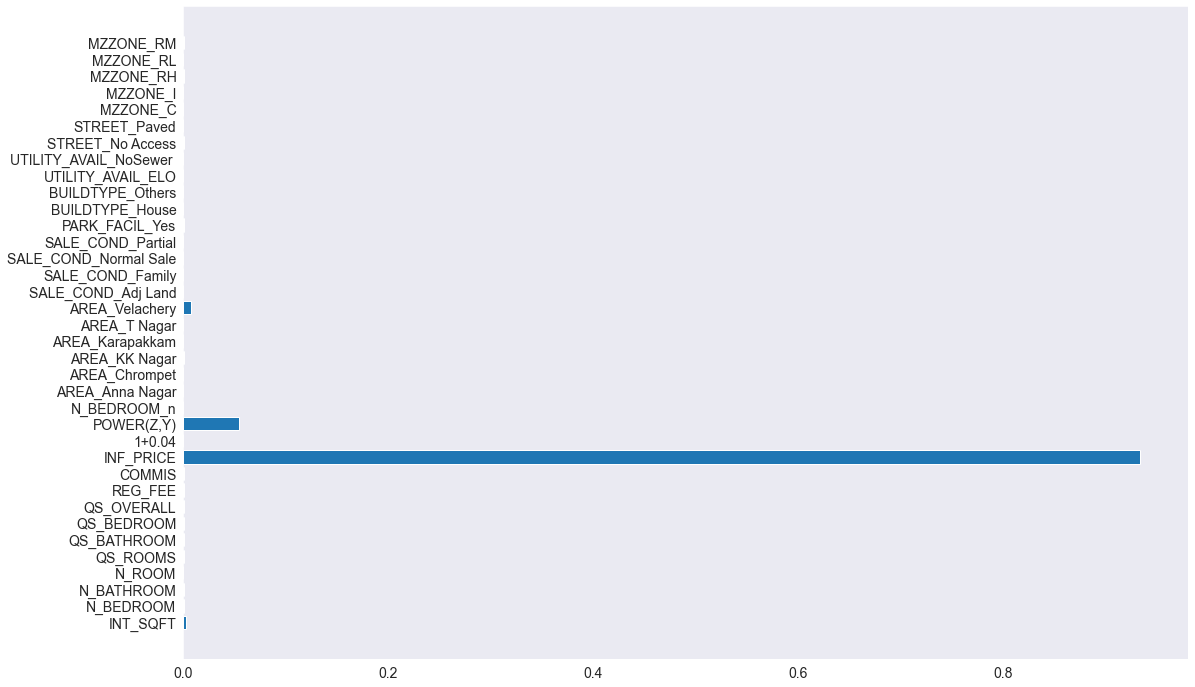

In [113]:
plt.rcParams.update({'figure.figsize': (18.0, 12.0)})
plt.rcParams.update({'font.size': 14})
plt.barh(x_train.columns,rf.feature_importances_)

In [114]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   INT_SQFT                100 non-null    float64
 1   N_BEDROOM               100 non-null    float64
 2   N_BATHROOM              100 non-null    float64
 3   N_ROOM                  100 non-null    float64
 4   QS_ROOMS                100 non-null    float64
 5   QS_BATHROOM             100 non-null    float64
 6   QS_BEDROOM              100 non-null    float64
 7   QS_OVERALL              100 non-null    float64
 8   REG_FEE                 100 non-null    float64
 9   COMMIS                  100 non-null    float64
 10  INF_PRICE               100 non-null    float64
 11  1+0.04                  100 non-null    float64
 12  POWER(Z,Y)              100 non-null    float64
 13  N_BEDROOM_n             100 non-null    float64
 14  AREA_Anna Nagar         100 non-null    flo

In [115]:
#X = X.drop(['QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', '1+0.04','N_BEDROOM_n' ],axis=1)

In [116]:
#X

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=42)


In [118]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((70, 36), (70,), (30, 36), (30,))